In [1]:
import matplotlib.pyplot as plt
from datetime import datetime
import yfinance as yf
import seaborn as sns
import pandas as pd
import numpy as np
import os

In [2]:
# Download historical stock data for a specific ticker
ticker = 'AAPL'

# Get today's date in the format "YYYY-MM-DD"
today = datetime.today().strftime('%Y-%m-%d')

stock_data = yf.download(ticker, start='2025-03-01', end='2025-03-31')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
display(stock_data)

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-03-03,238.029999,244.029999,236.110001,241.789993,47184000
2025-03-04,235.929993,240.070007,234.679993,237.710007,53798100
2025-03-05,235.740005,236.550003,229.229996,235.419998,47227600
2025-03-06,235.330002,237.860001,233.160004,234.440002,45170400
2025-03-07,239.070007,241.369995,234.759995,235.110001,46273600
2025-03-10,227.479996,236.160004,224.220001,235.539993,72071200
2025-03-11,220.839996,225.839996,217.449997,223.809998,76137400
2025-03-12,216.979996,221.750000,214.910004,220.139999,62547500


In [4]:
stock_close_prices = stock_data['Close']

In [5]:
def evaluate_trade_period(prices, period_length):
    prices_values = stock_close_prices.values
    result_list = []
    for i in range(0, len(prices_values)-period_length, 1):
        buy_price = prices_values[i][0]
        sell_price = prices_values[i+period_length][0]
        result_list.append(float(sell_price-buy_price))
        
    return np.array(result_list)

In [6]:
result_list = evaluate_trade_period(stock_close_prices, period_length=1)

print(stock_close_prices)
print()

print(f"Number of all Buy/Sell Pairs (periods): {len(result_list)}")
print(f"Sum of all Buy/Sell Pairs (periods): {sum(result_list)}")
print()

positive_results = result_list[result_list > 0]
print(f"Number of Pairs (periods) with positive result (win): {len(positive_results)}")
print(f"Sum of Pairs (periods) with positive result (win): {sum(positive_results)}")
print()

negative_results = result_list[result_list < 0]
print(f"Number of Pairs (periods) with negative result (lost): {len(negative_results)}")
print(f"Sum of Pairs (periods) with negative result (lost): {sum(negative_results)}")
print()

Ticker            AAPL
Date                  
2025-03-03  238.029999
2025-03-04  235.929993
2025-03-05  235.740005
2025-03-06  235.330002
2025-03-07  239.070007
2025-03-10  227.479996
2025-03-11  220.839996
2025-03-12  216.979996
2025-03-13  209.679993
2025-03-14  213.490005
2025-03-17  214.000000
2025-03-18  212.690002
2025-03-19  215.240005
2025-03-20  214.100006
2025-03-21  218.270004
2025-03-24  220.729996
2025-03-25  223.750000
2025-03-26  221.529999
2025-03-27  223.850006
2025-03-28  217.899994

Number of all Buy/Sell Pairs (periods): 19
Sum of all Buy/Sell Pairs (periods): -20.1300048828125

Number of Pairs (periods) with positive result (win): 8
Sum of Pairs (periods) with positive result (win): 22.58001708984375

Number of Pairs (periods) with negative result (lost): 11
Sum of Pairs (periods) with negative result (lost): -42.71002197265625



In [7]:
period_lengths, corresponding_results = [], []
for i in range(1, len(stock_close_prices), 1):
    result_list = evaluate_trade_period(stock_close_prices, period_length=i)
    period_lengths.append(i)
    corresponding_results.append(sum(result_list))

    print(f"Number of all Buy/Sell Pairs (periods): {len(result_list)}")
    print(f"Sum of all Buy/Sell Pairs (periods): {sum(result_list)}")
    print()
    
    positive_results = result_list[result_list > 0]
    print(f"Number of Pairs (periods) with positive result (win): {len(positive_results)}")
    print(f"Sum of Pairs (periods) with positive result (win): {sum(positive_results)}")
    print()
    
    negative_results = result_list[result_list < 0]
    print(f"Number of Pairs (periods) with negative result (lost): {len(negative_results)}")
    print(f"Sum of Pairs (periods) with negative result (lost): {sum(negative_results)}")
    print()
    print("------------------------------------------------------")

Number of all Buy/Sell Pairs (periods): 19
Sum of all Buy/Sell Pairs (periods): -20.1300048828125

Number of Pairs (periods) with positive result (win): 8
Sum of Pairs (periods) with positive result (win): 22.58001708984375

Number of Pairs (periods) with negative result (lost): 11
Sum of Pairs (periods) with negative result (lost): -42.71002197265625

------------------------------------------------------
Number of all Buy/Sell Pairs (periods): 18
Sum of all Buy/Sell Pairs (periods): -32.209991455078125

Number of Pairs (periods) with positive result (win): 9
Sum of Pairs (periods) with positive result (win): 26.340011596679688

Number of Pairs (periods) with negative result (lost): 9
Sum of Pairs (periods) with negative result (lost): -58.55000305175781

------------------------------------------------------
Number of all Buy/Sell Pairs (periods): 17
Sum of all Buy/Sell Pairs (periods): -46.41999816894531

Number of Pairs (periods) with positive result (win): 9
Sum of Pairs (periods)

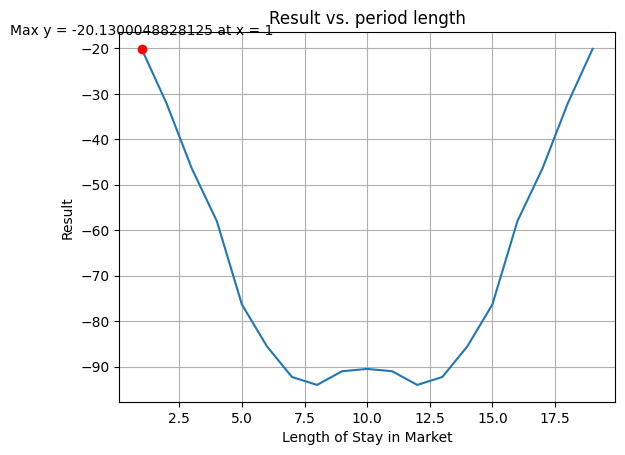

In [8]:
import matplotlib.pyplot as plt

# Creating the plot
plt.plot(period_lengths, corresponding_results)

# Adding title and labels
plt.title("Result vs. period length")
plt.xlabel("Length of Stay in Market")
plt.ylabel("Result")

# Enabling grid
plt.grid(True)

# Finding the maximum y value and its corresponding x
max_y = max(corresponding_results)
max_x = period_lengths[corresponding_results.index(max_y)]

# Plotting the maximum y value
plt.plot(max_x, max_y, 'ro')  # 'ro' stands for red circle marker

# Annotating the maximum y value and corresponding x value
plt.annotate(f'Max y = {max_y} at x = {max_x}', 
             (max_x, max_y), 
             textcoords="offset points", 
             xytext=(0, 10), 
             ha='center')

# Display the plot
plt.show()

In [9]:
result_list = evaluate_trade_period(stock_close_prices, period_length=max_x)

print(stock_close_prices)
print()

print(f"Number of all Buy/Sell Pairs (periods): {len(result_list)}")
print(f"Sum of all Buy/Sell Pairs (periods): {sum(result_list)}")
print()

positive_results = result_list[result_list > 0]
print(f"Number of Pairs (periods) with positive result (win): {len(positive_results)}")
print(f"Sum of Pairs (periods) with positive result (win): {sum(positive_results)}")
print()

negative_results = result_list[result_list < 0]
print(f"Number of Pairs (periods) with negative result (lost): {len(negative_results)}")
print(f"Sum of Pairs (periods) with negative result (lost): {sum(negative_results)}")
print()

Ticker            AAPL
Date                  
2025-03-03  238.029999
2025-03-04  235.929993
2025-03-05  235.740005
2025-03-06  235.330002
2025-03-07  239.070007
2025-03-10  227.479996
2025-03-11  220.839996
2025-03-12  216.979996
2025-03-13  209.679993
2025-03-14  213.490005
2025-03-17  214.000000
2025-03-18  212.690002
2025-03-19  215.240005
2025-03-20  214.100006
2025-03-21  218.270004
2025-03-24  220.729996
2025-03-25  223.750000
2025-03-26  221.529999
2025-03-27  223.850006
2025-03-28  217.899994

Number of all Buy/Sell Pairs (periods): 19
Sum of all Buy/Sell Pairs (periods): -20.1300048828125

Number of Pairs (periods) with positive result (win): 8
Sum of Pairs (periods) with positive result (win): 22.58001708984375

Number of Pairs (periods) with negative result (lost): 11
Sum of Pairs (periods) with negative result (lost): -42.71002197265625



In [10]:
total_investement = float(sum(stock_close_prices[0:max_x].values[:, 0]))

share_return = round((max_y/total_investement) * 100, 2) 

print(f"Share Return: {share_return} %")

Share Return: -8.46 %
